# Banking Domain (Loan Status Prediction)
### Name : Sheetal Gadpade
### Batch No : 151

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Step 1: Loading the Data

In [2]:
# importing data using pandas

df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# checking percentage of missing values

(df.isnull().sum()/df.shape[0]*100).round(2) 

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

### Data Cleaning

In [7]:
# checking both mean and median weather outliers affecting data or not 

df['person_emp_length'].median() , df['person_emp_length'].mean()

(4.0, 4.789686296787225)

In [8]:
df['loan_int_rate'].median() , df['loan_int_rate'].mean()

(10.99, 11.01169489224439)

In [9]:
# replacing null values with median

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['person_emp_length']

0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32576      1.0
32577      4.0
32578      3.0
32579      5.0
32580      2.0
Name: person_emp_length, Length: 32581, dtype: float64

In [10]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [13]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

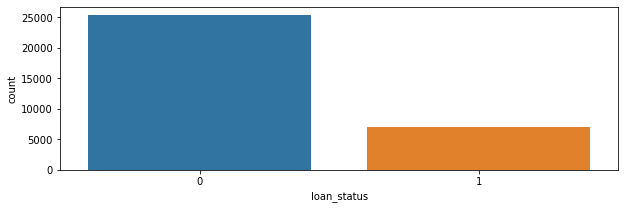

In [17]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.countplot(data=df,x='loan_status');

`
By above plot, i observed that loan_status of 0 are more compared to approved loan`

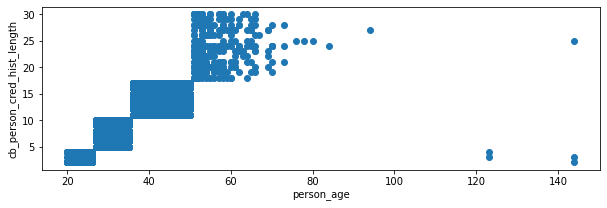

In [18]:
plt.figure(figsize=(10,3))
plt.scatter(x=df['person_age'],y=df['cb_person_cred_hist_length'])
plt.xlabel('person_age')
plt.ylabel('cb_person_cred_hist_length');

`By above plot,i observed that person_age and cb_person_cred_hist_length are related to each other i.e, if person_income increases then cb_person_cred_hist_length also increases`

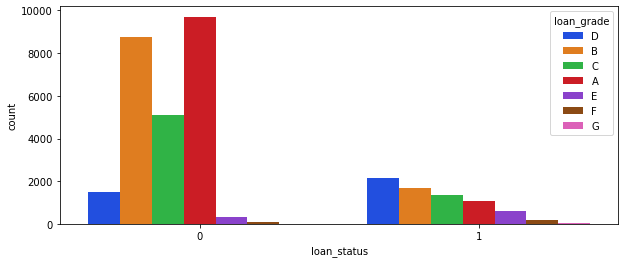

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='loan_status',hue='loan_grade',palette='bright');

`By above plot,i observed that loan_status of 0 has highest grade A and B.`

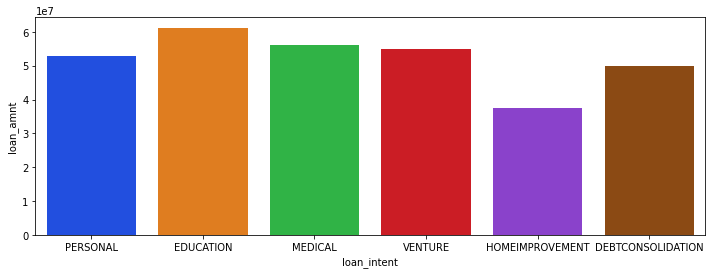

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(x='loan_intent',y='loan_amnt',data=df,ci=None,estimator=np.sum,palette='bright');

`By above plot,i observed that loan_amount taken by loan_intent of education is more while compared to others`

In [21]:
corr_matrix=df.corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.161454,0.050787,0.011853,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.135164,0.266820,0.000746,-0.144449,-0.254471,0.117987
person_emp_length,0.161454,0.135164,1.000000,0.113851,-0.051262,-0.082182,-0.054134,0.143069
loan_amnt,0.050787,0.266820,0.113851,1.000000,0.139483,0.105376,0.572612,0.041967
loan_int_rate,0.011853,0.000746,-0.051262,0.139483,1.000000,0.319360,0.114514,0.015762
loan_status,-0.021629,-0.144449,-0.082182,0.105376,0.319360,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054134,0.572612,0.114514,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.143069,0.041967,0.015762,-0.015529,-0.031690,1.000000


`By above plot,i observed that person_age and cb_person_cred_hist_length are directly proportional to each other somewhat where remaining are inversely proportional to each other`

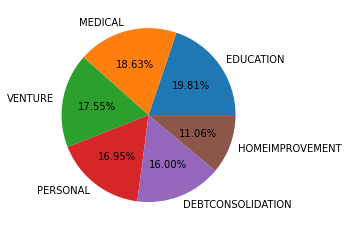

In [22]:
plt.pie(x = df.loan_intent.value_counts().values,
       labels = df.loan_intent.value_counts().index,
       autopct = '%.2f%%');

`By above plot, i observed that education loan taken by the customers is 19.78% and it is more while compared to other loans`

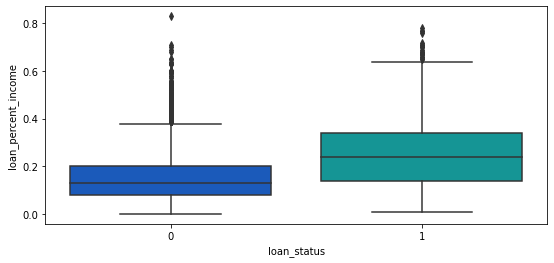

In [23]:
plt.figure(figsize=(9,4))
sns.boxplot(x='loan_status',y='loan_percent_income',data=df,palette='winter');

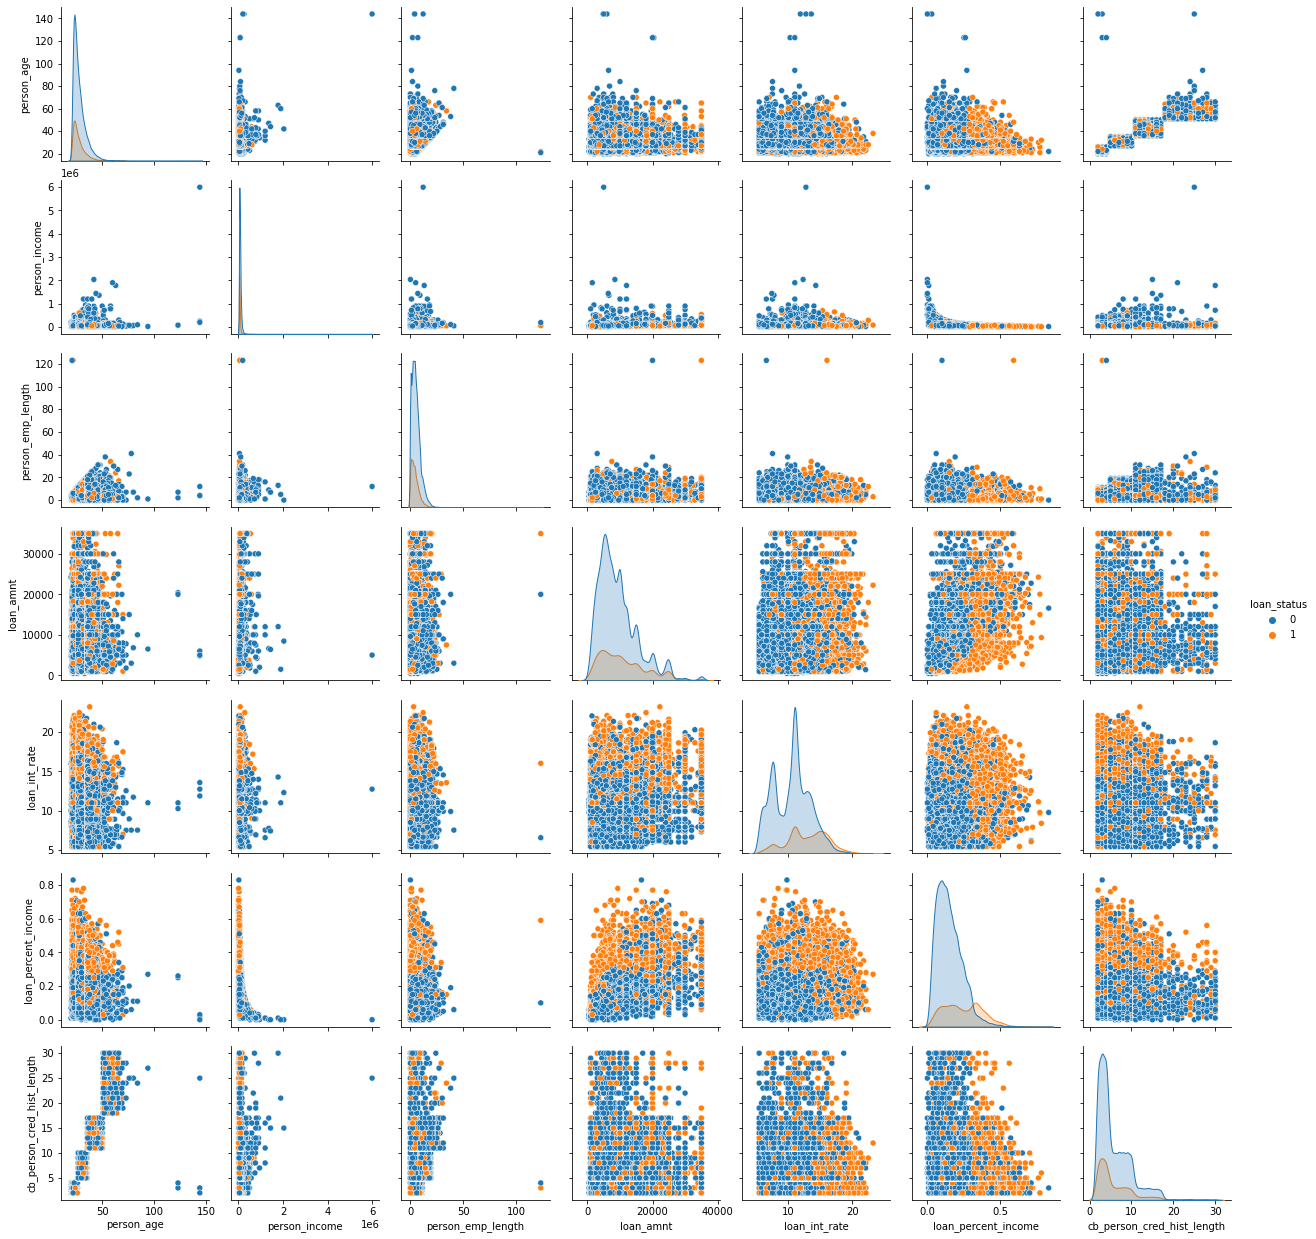

In [24]:
sns.pairplot(df,hue="loan_status")

## Step 2 : Data preparation

In [12]:
# Identify the input and output/target variables

X = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

y = df[ 'loan_status']

In [13]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [14]:
df.loan_grade.value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

## Step 3 : Spliting the dataset into Training and Testing (75:25)

In [15]:
# splitting data into train ad test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=100)

In [16]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(24435, 11) (24435,)
(8146, 11) (8146,)


## Step 4 : Data preparation on train data

In [17]:
# separating  numerical and categorical columns

X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_cat = X_train.select_dtypes(include=['object','category'])

In [18]:
X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2009,26,37000,0.0,14000,9.88,0.38,4
24210,35,70000,6.0,17000,9.88,0.24,6
22659,29,42000,0.0,7500,12.87,0.18,8
15764,22,166000,1.0,23450,11.36,0.14,3
11378,26,57800,0.0,15000,10.99,0.22,3
...,...,...,...,...,...,...,...
12119,24,80000,8.0,18000,7.90,0.23,2
24423,29,66000,4.0,8200,17.04,0.12,7
14147,23,100000,0.0,7000,8.59,0.07,3
23320,32,66000,1.0,8000,7.29,0.12,10


In [19]:
# Rescaling the numerical data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns=X_train_num.columns,
                                   index = X_train_num.index)
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2009,-0.275489,-0.459960,-1.176126,0.702980,-0.366597,1.970471,-0.444805
24210,1.166406,0.061297,0.304560,1.178175,-0.366597,0.659549,0.049120
22659,0.205143,-0.380982,-1.176126,-0.326610,0.601103,0.097726,0.543044
15764,-0.916331,1.577683,-0.929345,2.199845,0.112398,-0.276823,-0.691767
11378,-0.275489,-0.131410,-1.176126,0.861378,-0.007351,0.472275,-0.691767


In [20]:
# converting categorical data into numerical data using labelencoding

X_train_cat.person_home_ownership.value_counts()

RENT        12294
MORTGAGE    10110
OWN          1949
OTHER          82
Name: person_home_ownership, dtype: int64

In [21]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24435 entries, 2009 to 5640
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      24435 non-null  object
 1   loan_intent                24435 non-null  object
 2   loan_grade                 24435 non-null  object
 3   cb_person_default_on_file  24435 non-null  object
dtypes: object(4)
memory usage: 954.5+ KB


In [97]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,RENT,PERSONAL,B,N
24210,OWN,VENTURE,B,N
22659,RENT,EDUCATION,C,Y
15764,MORTGAGE,EDUCATION,B,N
11378,MORTGAGE,MEDICAL,D,Y


In [98]:
X_train_o=X_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_le = X_train_cat['loan_grade']

In [99]:
X_train_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
2009,RENT,PERSONAL,N
24210,OWN,VENTURE,N
22659,RENT,EDUCATION,Y
15764,MORTGAGE,EDUCATION,N
11378,MORTGAGE,MEDICAL,Y


In [100]:
X_train_le.unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

In [101]:
# applying one hot encoding on Nominal data

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first', sparse=False)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train_cat_o = pd.DataFrame(encoder.fit_transform(X_train_o), 
                               columns=encoder.get_feature_names_out(X_train_o.columns), 
                               index = X_train_o.index)

X_train_cat_le = pd.DataFrame(index = X_train_cat.index)


In [102]:
X_train_cat.loan_grade.value_counts()

A    8067
B    7865
C    4804
D    2744
E     718
F     185
G      52
Name: loan_grade, dtype: int64

In [103]:
col = {'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}


X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : col[x])

In [104]:
X_train_cat_le['loan_grade'] 

2009     6
24210    6
22659    5
15764    6
11378    4
        ..
12119    7
24423    3
14147    7
23320    7
5640     6
Name: loan_grade, Length: 24435, dtype: int64

In [105]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_le,X_train_cat_o],axis=1)
X_train_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
2009,-0.275489,-0.459960,-1.176126,0.702980,-0.366597,1.970471,-0.444805,6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24210,1.166406,0.061297,0.304560,1.178175,-0.366597,0.659549,0.049120,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22659,0.205143,-0.380982,-1.176126,-0.326610,0.601103,0.097726,0.543044,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
15764,-0.916331,1.577683,-0.929345,2.199845,0.112398,-0.276823,-0.691767,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11378,-0.275489,-0.131410,-1.176126,0.861378,-0.007351,0.472275,-0.691767,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,-0.595910,0.219254,0.798122,1.336573,-1.007415,0.565912,-0.938729,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24423,0.205143,-0.001886,-0.189002,-0.215731,1.950705,-0.464097,0.296082,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14147,-0.756120,0.535168,-1.176126,-0.405810,-0.784100,-0.932283,-0.691767,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23320,0.685775,-0.001886,-0.929345,-0.247411,-1.204839,-0.464097,1.036968,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Step 5 : Data preparation on Test data

In [106]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10775,25,40000,RENT,0.0,EDUCATION,B,10000,12.18,0.25,N,3
28127,30,125000,MORTGAGE,14.0,VENTURE,A,5750,7.43,0.05,N,10
17835,29,70500,RENT,5.0,PERSONAL,A,35000,8.90,0.50,N,6
15419,26,135000,MORTGAGE,11.0,EDUCATION,A,6700,6.03,0.05,N,4
20158,30,34000,RENT,0.0,VENTURE,B,4000,10.95,0.12,N,10


In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 10775 to 1534
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8146 non-null   int64  
 1   person_income               8146 non-null   int64  
 2   person_home_ownership       8146 non-null   object 
 3   person_emp_length           8146 non-null   float64
 4   loan_intent                 8146 non-null   object 
 5   loan_grade                  8146 non-null   object 
 6   loan_amnt                   8146 non-null   int64  
 7   loan_int_rate               8146 non-null   float64
 8   loan_percent_income         8146 non-null   float64
 9   cb_person_default_on_file   8146 non-null   object 
 10  cb_person_cred_hist_length  8146 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 763.7+ KB


In [108]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include = ['int64','float64'])

In [109]:
X_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10775,25,40000,0.0,10000,12.18,0.25,3
28127,30,125000,14.0,5750,7.43,0.05,10
17835,29,70500,5.0,35000,8.90,0.50,6
15419,26,135000,11.0,6700,6.03,0.05,4
20158,30,34000,0.0,4000,10.95,0.12,10
...,...,...,...,...,...,...,...
28496,28,57360,3.0,23000,10.99,0.40,8
6651,26,50000,10.0,6000,10.99,0.12,3
19356,29,32400,0.0,4000,12.98,0.12,6
1571,25,33000,5.0,1500,11.48,0.05,4


In [110]:
# rescaling numerical data

X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10775,-0.435699,-0.412573,-1.176126,0.069386,0.377788,0.753187,-0.691767
28127,0.365353,0.930060,2.278809,-0.603808,-1.159528,-1.119558,1.036968
17835,0.205143,0.069195,0.057779,4.029347,-0.683770,3.094117,0.049120
15419,-0.275489,1.088017,1.538466,-0.453329,-1.612632,-1.119558,-0.444805
20158,0.365353,-0.507347,-1.176126,-0.881005,-0.020296,-0.464097,1.036968


In [112]:
X_test_o=X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_le = X_test_cat['loan_grade']

In [119]:
X_test_cat_o = pd.DataFrame(encoder.fit_transform(X_test_o), 
                               columns=encoder.get_feature_names_out(X_test_o.columns), 
                               index = X_test_o.index)

X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

In [120]:
col = {'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}


X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : col[x])

In [122]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_le,X_test_cat_o],axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
10775,-0.435699,-0.412573,-1.176126,0.069386,0.377788,0.753187,-0.691767,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28127,0.365353,0.930060,2.278809,-0.603808,-1.159528,-1.119558,1.036968,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17835,0.205143,0.069195,0.057779,4.029347,-0.683770,3.094117,0.049120,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15419,-0.275489,1.088017,1.538466,-0.453329,-1.612632,-1.119558,-0.444805,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20158,0.365353,-0.507347,-1.176126,-0.881005,-0.020296,-0.464097,1.036968,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Step 6 : Model training phase

# KNN Classifier

In [171]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(100)
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=100)

In [172]:
y_test_pred = classifier.predict(X_test_transformed)

In [173]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
temp_df.head(5)

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0


In [174]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.88

# Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [156]:
y_test_pred = classifier.predict(X_test_transformed)

In [157]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.86

# Support Vector Machine

In [158]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [159]:
y_test_pred = classifier.predict(X_test_transformed)

In [160]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.89

#  Decision Trees

In [161]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [162]:
y_test_pred = classifier.predict(X_test_transformed)

In [163]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.89

# Random Forest Classifier

In [164]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [165]:
y_test_pred = classifier.predict(X_test_transformed)

In [166]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.94

In [177]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
temp_df.head(7)

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0
20379,0,0
7538,0,0


In [140]:
algorithms = [ 'KNN', 'Logistic Regression', 'Support Vector Machines', 'Decision Trees' ,'Random Forest']
accuracy = [0.88,0.86,0.89,0.89,0.94]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


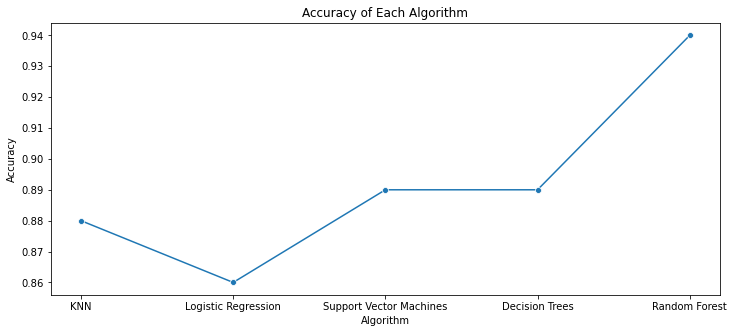

In [181]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(algorithms,accuracy,palette='husl',marker='o')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Algorithm');

## Conclusion 

`According to my model,I found out that Random Forest Algorithm model is performing best on the train set as well as test set with 94% accuracy .I will be using Random Forest Algorithm to predict our values followed by Decision Tree and Support Vector machine algorithm with 89%. Random Forest algorithm `

